# TP correction de biais

## Introduction

Le but de ce TP est d'illustrer le principe des méthodes de type "perfect prognosis". Nous nous focaliserons sur deux méthodes classique de "perfect prognosis" que sont la régression linéaire et la régression par plus proche voisin (i.e. par analogues). Nous les utiliserons dans un contexte de descente d'échelle où le but est de prédire les valeurs de variables climatiques à l'échelle du bassin du Tech (ou du Lez) à partir des valeurs des mêmes variables climatiques cette fois-ci moyennées à l'échelle de la région Occitanie. Dans un premier temps, la relation entre large et petite échelle sera apprise sur les réanalyses SAFRAN. Dans un second temps, nous verrons si cette relation peut être appliquée pour faire de la descente d'échelle avec les simulations des modèles suivants :

| gcm               | rcm           | run    | scenario   |
|:------------------|:--------------|:-------|:-----------|
| IPSL-IPSL-CM5A-MR | IPSL-WRF381P  | r1i1p1 | historical |
|                   |               |        | rcp45      |
|                   |               |        | rcp85      |
| MOHC-HadGEM2-ES   | ICTP-RegCM4-6 | r1i1p1 | historical |
|                   |               |        | rcp85      |


La figure ci-dessous illustre les points de grilles SAFRAN utilisés pour construire respectivement les séries temporelles moyennées sur la région Occitanie, le bassin du Tech et le bassin du Lez :

<img src="figures/Occitanie_grid_weight.png" width=600/>

Les cases et la colorbar associées représentent la portion de chaque point de grille interceptant la région Ocitanie, les bassins Tech et Lez, les séries des modèles et des observations SAFRAN ont été calculés avec une moyenne pondéré par ces valeurs.

## Rappels préliminaires

### Notations
Pour la variable climatique $j, j \in \{1,\ldots,p\}$, les données moyennées à l'échelle de la région Occitanie sont dénotées par :
$$ \mathbf{x_j} = (x_{1,j}, \ldots, x_{n, j})' \in \mathbb{R}^n$$

et les données moyennées à l'échelle du bassin pour cette même variable sont dénotées par :
$$ \mathbf{y_j} = (y_{1,j}, \ldots, y_{n, j})' \in \mathbb{R}^n$$

où $n$ est le nombre de pas de temps

On suppose que les données $x_{i,j}$ et $y_{i,j}$ sont respectivement des réalisations des variables aléatoires $X_j$ et $Y_j$, pour $i \in \{1,\ldots,n\}$ et $j \in \{1,\ldots,p\}$.

### Perfect prognosis et régression 

Dans les méthodes de perfect prognosis, pour faire de la descente d'échelle statistique pour la variable climatique $X_j$, on cherche à trouver une fonction, $f$, qui transforme les réalisations des variables climatiques de grande échelle $(x_{i,1}, \ldots, x_{i,p})$ en réalisations $y_{i,j}$  de la variable à fine échelle $Y_j$, pour $i \in \{1,\ldots,n\}$.
Les variables de grandes échelle $X_j, j \in \{1,\ldots, p\}$  sont appellées des *prédicteurs* et la variable à prédire $Y_j$ est le *prédictant*.
.

On suppose que la transformation n'est pas parfaite et qu'il reste en générale une erreur résiduelle $\epsilon$. Le modèle statistique est alors le suivant:
$$ y_{i,j} = f(x_{i,1}, \ldots, x_{i,p}) + \epsilon_i $$
pour $i \in \{1,\ldots,n\}$. Les erreurs, $\epsilon_i, i \in \{1,\ldots,n\}$, sont supposés aléatoires, de moyenne nulle, et en générale indépendantes et identiquement distibuées.



Avec ce modèle, on note alors que :
$$  f(x_{i,1}, \ldots, x_{i,p}) = \mathbb{E}[Y_j | X_1 = x_{i, 1}, \ldots, X_p = x_{i, p}] $$

*Remarque importante*:  Dans ce modèle de régréssion, on suppose que les réalisations des variables $X_j$ et $Y_j$ sont apparaillées.
Ainsi, les méthodes de types perfect prognosis ne pas peuvent être employé (en tous cas pas directement) pour faire la descente d'échelle entre une série temporelle à large échelle provenant d'un modèle climatique et une série temporelle à fine échelle issue d'observations, les deux séries n'ayant pas la même temporalité.

Il existe plusieurs façons pour tenter d'approcher et d'estimer $f$. Nous pouvons avoir recours à des méthodes de régression dites paramétriques et non-paramétriques.

Dans les méthodes paramétriques, nous supposons connaitre la forme générale de la fonction $f$. Dans ce cas, le nombre de paramètres à estimer est fixe et ne dépend pas du nombre d'individus.

La **régression linéaire** suppose par exemple une relation linéaire entre les prédicteurs et le prédictant:
$$f(x_{i,1}, \ldots, x_{i,p}) = b_0 + b_1 x_{i,1} + \ldots + b_p x_{i,p}$$ 
où les paramètres $b_j, j \in \{0, \ldots, p\}$ sont à estimer à partir des données, par exemple par moindres carrés.

Pour un nouveaux p-uplet de prédicteurs de grande échelle, $(x_{*,1}, \ldots, x_{*,p})$, la prediction à fine échelle est données par:
$$\hat{y}_{*,j} = \hat{b_0} + \hat{b_1} x_{*,1} + \ldots + \hat{b_p} x_{*,p}$$
où $\hat{b_j}, j \in \{0, \ldots, p\}$ sont les paramètres estimés.

*Exemple synthétique de régréssion linéaire avec 1 prédicteurs :*

<img src="figures/reglinsimple.svg" width=600/>

Dans les méthodes non-paramétriques, nous ne faisons pas d'hypothèses sur la forme de la fonction $f$, elle est déterminée par les données. Contrairement à ce que l'on peux penser, les régressions non-paramétriques possèdent (implicitement) des paramètres dont le nombre augmente avec le nombre d'individus.

La **régression par plus proche voisin** (k-nearest-neighbours avec $k = 1$) est une méthode de régression non-paramétrique où un pour p-uplet de prédicteurs de grande échelle, $(x_{*,1}, \ldots, x_{*,p})$, la prediction à fine échelle est données par:
$$f(x_{*,1}, \ldots, x_{*,p}) = y_{i^*, j}$$
avec $$i^* = \underset{i}{\arg\min} \quad d\{(x_{i,1}, \ldots, x_{i,p}), (x_{*,1}, \ldots, x_{*,p})\}$$
où $d$ est une distance, par exemple la distance euclidienne.

Moins formellement, la prédiction par la méthode du plus proche voisin (du plus proche analogue) revient à prendre dans un catalogue de situations météorologiques observées dans le passé,  la valeur de la variable à fine échelle correspondant à la situation de grande échelle la plus proche de celle pour laquelle nous voulons faire une prédiction. Ce catalogue de situations météorologiques est aussi appelé parfois "base d'apprentissage" ou "période de calibration".

*Exemple synthétique de régréssion par plus proche voisin avec 1 prédicteurs :*

<img src="figures/regknn.svg" width=600/>

### Evaluation des modèles statistiques pour la prédiction.

Il faut bien faire la différence entre :

- la qualité de l'ajustement, i.e. la capacité du modèle à pouvoir "coller" aux données qui ont servi à calibrer le modèle,
- la capacité de généralisation, i.e. la capacité de notre modèle à faire de bonnes prédictions même sur des situations qui ne sont pas présente dans la base d'apprentissage.

Plus un modèle est complexe (i.e. plus il a de paramètres) plus il sera capable de s'ajuster aux données; mais cela ne garantie pas sa capacité de généralisation.

<img src="figures/Generalisation-et-Sur-Apprentissage_W640.jpg" width=600/>

*source : [Arthur Charpentier](https://hal.archives-ouvertes.fr/hal-01568851v1) *

*Exemple synthétique de sur-apprentissage*

<img src="figures/knn_overfit.svg" width=600/>

C'est pourquoi, lorsque c'est possible, on divise toujours nos données en deux parties indépendantes: une qui sert à ajuster nos modèles, l'autre à évaluer leurs performances de prédiction.

---

## Quelques réglages

### Chemin vers les données

Le chemin d'accès vers les données d'entrée sera contenu dans la variable `ipath`, à modifier en fonction de l'endroit où vous avez mis les données sur votre ordinateur. Normalement le repertoire `ipath` doit contenir les repertoires `CORDEX` et `SAFRAN`.

Notez que la fonction `file.path` permet de joindre des chemins sans se soucier si le séparateur est un `/` (UNIX-like) ou un `\` (windows).

In [17]:
ipath = file.path(".", "data")
ipath 

[1] "./data"

### Fonctions d'extraction des données

Ici sont réunis les fonctions pour extraires les données:

- `SI2human_units`: cette fonction transforme les unités. (K -> °C, kg/m2/s -> mm / jour),
- `read_observations`: cette fonction permet de relire les données SAFRAN,
- `read_models`: cette fonction permet de relire les données des modèles,
- `extract_period`: cette fonction permet de sélectionner une saison et une sous période de temps.


In [2]:
SI2human_units = function(X)
{
	for( v in list("tas","tasmin","tasmax") )
		X[,v] = X[,v] - 273.15
	
	X[,"prtot"] = 86400 * X[,"prtot"]
	
	return(X)
}

In [3]:
## zone: 'Lez' ou 'Tech'
## ipath: chemin d'accès
read_observations = function( zone , ipath )
{
    dir = "SAFRAN"
    ifile = paste0(dir,"_",zone,".csv")
    if (zone == "Occitanie") {
        dir = "Occitanie"
        ifile = paste0("SAFRAN_",zone,"_weight.csv")

    }
    Y     = read.csv( file.path( ipath , dir , ifile ) , header = TRUE , row.names = 1 )

	return( SI2human_units(Y) )
}

In [4]:
## gcm: identifiant gcm (voir le tableau de l'introduction)
## rcm: identifiant rcm (voir le tableau de l'introduction)
## run: identifiant du run (voir le tableau de l'introduction)
## scenario: le scénario
## zone: 'Lez' ou 'Tech'
## ipath: chemin d'accès
read_models = function( gcm , rcm , run , scenario , zone , ipath )
{

	ifileh = paste0( paste( gcm , rcm , run , "historical" , zone , sep = "_" ) , ".csv" )
	ifilef = paste0( paste( gcm , rcm , run , scenario     , zone , sep = "_" ) , ".csv" )
	dir = "CORDEX"
    if (zone == "Occitanie") dir = "Occitanie"
	Xh = read.csv( file.path( ipath , dir , ifileh ) , header = TRUE , row.names = 1 )
	Xf = read.csv( file.path( ipath , dir , ifilef ) , header = TRUE , row.names = 1 )
	
	X  = rbind(Xh,Xf)
	
	return(SI2human_units(X))
}

In [5]:
## data: données d'entrée
## seas: la saison choisie, 'JJA', 'DJF', 'MAM' ou 'SON'
## period: un vecteur de deux années
extract_period = function( data , seas , period )
{
	## Build period
	t0 = base::paste( as.integer(period[1]) - 1 , "11" , "30" , sep = "-" )
	t1 = base::paste( as.integer(period[2])     , "12" , "01" , sep = "-" )
	
	## Transform seas to numbers
	mseas = list(
			"MAM" = base::c("03","04","05"),
			"JJA" = base::c("06","07","08"),
			"SON" = base::c("09","10","11"),
			"DJF" = base::c("12","01","02")
			)
	
	## Extract period
	odata = subset( data  , (t0 < row.names(data)) & (row.names(data) < t1) & (format.Date( row.names(data) , "%m" ) %in% mseas[[seas]]) )
	
	return(odata)
}

---

## I. Exploration des données

Nous proposons de faire une première fois ce TP sur la zone *Tech*, en se restreignant aux étés. Nous prendrons comme période calibration 1976 / 2005, et comme période de validation 2006 / 2020. Initialisons donc les variables correspondantes:

In [19]:
zone  = "Tech"
seas  = "JJA"
calib = c(1976,2005)
valid = c(2006,2020)

Dans la deuxième partie du TP, nous travaillerons aussi avec le modèle *IPSL-IPSL-CM5A-MR / IPSL-WRF381*, scénario *rcp85*:

In [18]:
gcm      = "IPSL-IPSL-CM5A-MR"
rcm      = "IPSL-WRF381P"
run      = "r1i1p1"
scenario = "rcp85"


### I.1. Les observations

Chargement des des données SAFRAN à grande échelle (variable `X`) et à fine échelle (variable `Y`) à l'aide de la fonction `read_observations`. On utilise la fonction `extract_period` pour séparer les données en base de calibration et base de validation.

In [13]:
Y = read_observations( zone , ipath )
X = read_observations( "Occitanie" , ipath )

In [20]:
Yc = extract_period( Y , seas , calib )
Yv = extract_period( Y , seas , valid )
Xc = extract_period( X , seas , calib )
Xv = extract_period( X , seas , valid )

### I.3. Format des données

Les données `Yc`, `Yv`, `Xc` et `Xv` sont des `data.frame` où les lignes sont l'axe du temps, et les colonnes les variables. Vous pouvez ainsi accéder directement à une ligne / colonne particulière avec la syntaxe suivante:

- `Yc[,"tas"]`: Affiche la colonne contenant la température moyenne.
- `Yc["1976-01-01",]`: Affiche toutes les variables le 1er janvier 1976.


In [21]:
str(Yc)

'data.frame':	2760 obs. of  6 variables:
 $ tas    : num  19.19 16.13 12.5 10.28 8.55 ...
 $ tasmin : num  15.43 13.75 9.8 6.11 5.38 ...
 $ tasmax : num  22.6 18 14.5 12.4 10.4 ...
 $ huss   : num  0.00848 0.00765 0.00482 0.00401 0.00344 ...
 $ sfcWind: num  1.86 3.11 2.96 2.22 2.71 ...
 $ prtot  : num  0.202 0.812 0 0 0 ...


**Astuce** Vous pouvez afficher les noms des lignes et colonnes avec les fonctions `colnames` et `rownames`.

### I.4. Quels différences entre les variables à grande et fine échelle ?

**Q1.** Comparer, sur la période de calibration, les observations grandes et fines échelles à l'aide d'un scatterplot (fonction `plot`) et calculer l'erreur quadratique moyenne (MSE: Mean Square Error) ainsi que la corrélation.

--- mse --- 


tas       tasmin       tasmax         huss      sfcWind        prtot 
2.784193e+00 1.421333e+00 9.542982e+00 1.453408e-06 9.943475e-01 2.926893e+01

--- corr --- 


tas    tasmin    tasmax      huss   sfcWind     prtot 
0.9539743 0.9240604 0.9188813 0.8958389 0.7215227 0.5621324

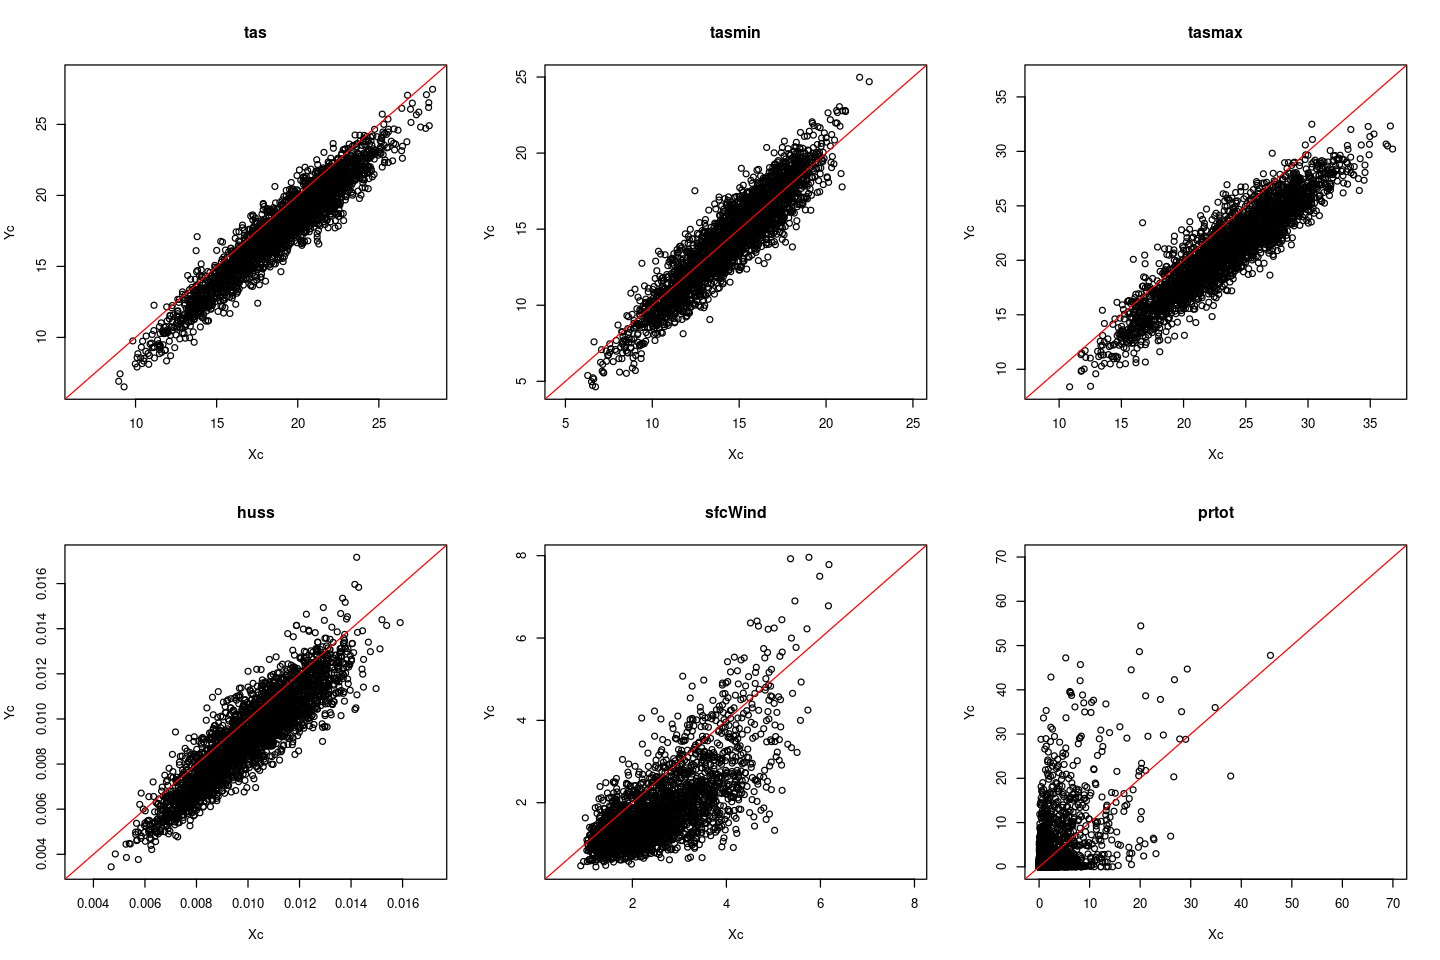

In [22]:
xylim <- as.data.frame(apply(rbind(Xc, Xv, Yc, Yv), 2, range))

mse_cal <- apply((Yc - Xc)^2, 2, mean)

cat("--- mse --- \n")
mse_cal

corr_cal <- mapply(cor, x = Xc, y = Yc)

cat("--- corr --- \n")
corr_cal

options(repr.plot.width =12, repr.plot.height = 8)
par(mfrow = c(2, 3))
invisible(mapply(
        function(x, y, main, xlab, ylab, xlim, ylim){
        plot(x = x, y = y, main = main, xlab = xlab, ylab = ylab, xlim = xlim, ylim = ylim)
        abline(b = 1, a = 0, col = "red")
        },
    x = Xc, y = Yc, main = names(Xc), xlab = "Xc", ylab = "Yc", xlim = xylim, ylim = xylim
))

**Q2.** Faire de même sur la période de validation. Y'a-t-il une différence ?

**Q3.** Comparer,  sur la période de calibration, les distributions des observations grandes et fines échelles à l'aide d'un graphique quantile-quantile (fonction `qqplot`).

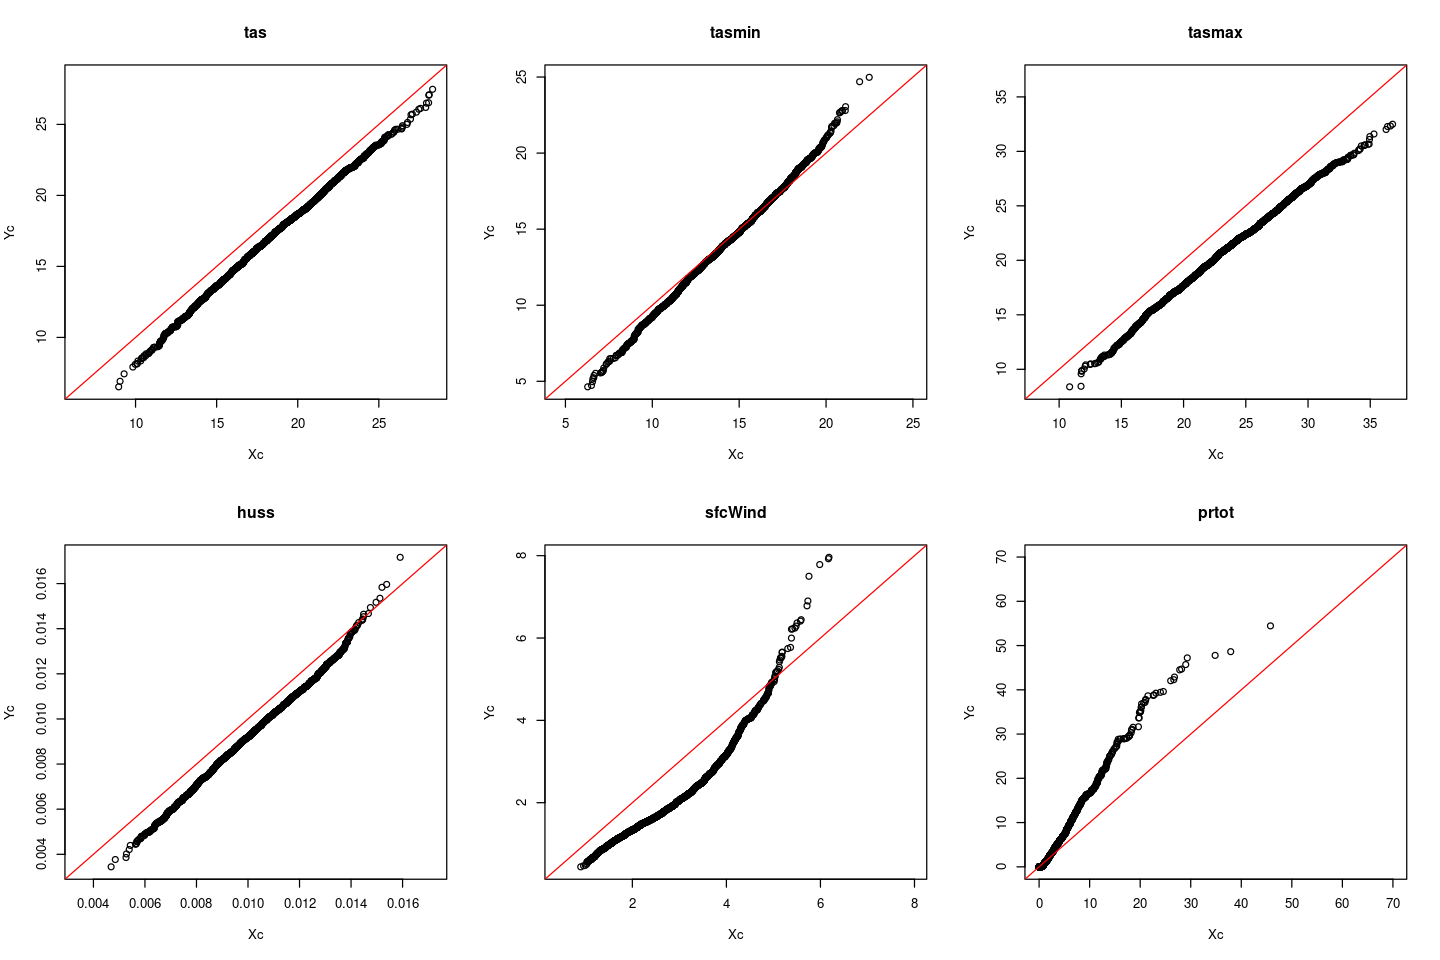

In [16]:
options(repr.plot.width =12, repr.plot.height = 8)
par(mfrow = c(2, 3))
invisible(mapply(
    function(x, y, main, xlab, ylab, xlim, ylim){
        qqplot(x = x, y = y, main = main, xlab = xlab, ylab = ylab, xlim = xlim, ylim = ylim)
        abline(b = 1, a = 0, col = "red")
        },
    x = Xc, y = Yc, main = names(Xc), xlab = "Xc", ylab = "Yc", xlim = xylim, ylim = xylim
))

**Q4.** Faire de même sur la période de validation. Y'a-t-il une différence ?

---

## II Downscaling sur observations

## II.1 Régression Linéaire

**Q5.** Utiliser la fonction `lm` pour contstruire un modèle de descente d'échelle pour la variable `tas`. Le modèle prendra comme prédicteurs les 6 variables climatiques à grande échelle. Vous pouvez accéder à l'aide de la fonction `lm` en tappant `?lm`. Afficher le modèle ajusté avec la fonction `summary`.

***Tips*** La fonction `lm` permet de décrire un modèle linéaire de manière simple à l'aide des *formula*. Par exemple,  le modèle de regression linéaire suivant:
$$ \mathbf{y} = a_0 \mathbf{x}_0 + a_1 \mathbf{x}_1$$
où $\mathbf{y}$ est le predictant, et $\mathbf{x}_0$ et $\mathbf{x}_1$ les predicteurs, peut être décrit de la manière suivante:
~~~R
lm( "y ~ x0 + x1" , data = data.frame( y = <mes données y> , x0 = <mes données x0> , x1 = <mes données x1>) )
~~~

**Q6.** Evaluer à l'aide d'un scatterplot, de la corrélation et de la du MSE, la qualité d'ajustement du modèle sur la période de calibration. Y'a-t-il une amélioration par rapport à `tas` moyennée à grande échelle ? Utiliser la fonction `predict` pour obtenir les prédictions à fine échelle.

**Q7.** De mễme, évaluer la capacité de généralisation du modèle sur la période de validation. Les résultas sont-il similaires à ceux obtenus sur la période de calibration ?

**Q8.** Créer, ajuster et évaluer un modèle de régression linéaire pour faire de la descente d'échelle pour la variable `prtot`. Que pensez-vous des résultats ?

**Question bonus:**  Essayer de trouver la meilleurs combinaisons de prédicteurs qui donne les meilleurs résultats sur la période de validation pour la prédiction de `tas` ou de `pr`. Vous pouvez par exemple utiliser la fonction `step`. 

## II.2. Régression par plus proche voisin

**Q9.** Utiliser la régression par plus proche vosin pour la faire de descente d'échelle pour la variable `tas` sur la période de calibration. Le modèle prendra comme prédicteurs les 6 variables climatiques à grande échelle. Vous pouvez par exemple utiliser la distance euclidienne pour trouver le plus proche voisin. Evaluer la capacité d'ajustement de la régression par plus proche voisin.

**astuce :** vous pouvez, si vous le souhaitez, utiliser les fonctions `nndist` et `nn` définies ci-dessous.

In [ ]:
# Calcul des distances d'une situation (tuple) aux situations présentes dans le catalogue (calset)
nndist <- function(tuple, calset) {  
    diff <- sweep(calset, MARGIN = 2, STATS = as.numeric(tuple), FUN="-", check.margin=T)
    sqrt(apply(diff^2, 1, sum))
}

# Pour chaque lignes de la matrice tuples, 
# retourne l'indice de ligne correspondant à l'analogue le plus proche dans le catalogue.
nn <- function(tuples, calset) {
    apply(tuples, 1, function(tuple) which.min(nndist(tuple, calset)))
}

**Q10.** Appliquer la régression par plus proche vosin pour faire la descente d'échelle pour la variable `tas` sur validation en utilisant les données de la période de calimration comme catalogue de situations météorologiques. Evaluer la capacité de généralisation de la régression par plus proche voisin. Les résultats sont-il similaires à ceux obtenus sur la période de calibration ?

**Q11.** Créer, ajuster et évaluer un modèle de régression par plus proche voisin pour faire de la descente d'échelle pour la variable `prtot`. Que pensez-vous des résultats ?

**Question bonus:** Cela fait-il une différence si on normalise au préalable les predicteurs ? vous pouvez utiliser la fonction `scale`.

**Question bonus:**  Essayer de trouver la meilleurs combinaisons de prédicteurs qui donne les meilleurs résultats sur la période de validation pour la prédiction de `tas` ou de `pr`. 


**Question bonus**: Quel est votre meilleur modèle ? Quelles pistes d'amélioration ?

## III. Appliquer les modèles de descente échelle aux modèles de climat.

### III.1. Chargement des données de grande échelle du modèle de climat

In [ ]:
X_rcm = read_models( gcm , rcm , run , scenario , 'Occitanie' , ipath )

In [ ]:
Xc_rcm = extract_period( X_rcm , seas , calib )
Xv_rcm = extract_period( X_rcm , seas , valid )

#### III.2. Appliquer le modèle linéaire

**Q12.** Appliquer, pour la variable `tas`, la relation entre grande échelle et  petite échelle apprise sur les données SAFRAN aux données de grande échelle du RCM sur la période de calibration et de validation. 

**Q13.** Le RCM et les réanalyse SAFRAN n'ayant pas la même temporalité, évaluer à l'aide d'un graphique quantile-quantile si les distributions de `tas` obtenu par descente d'échelle du RCM s'est rapproché de la distribution de `tas` de SAFRAN à fine échelle.

**Q14.** Faire la comparaison avec les résultats de descente d'échelle du obtenus sur le jeu de données SAFRAN

#### III.3. Appliquer le modèle du plus proche voisin

**Q15.** Faire les mêmes diagnostics que pour la régression linéaire.

**Q16.** Selon vous, pourquoi le distribution de la `tas` obtenu par descente d'échelle des données RCM est différente de la distribution `tas` de SAFRAN à fine échelle ?

**Q17.** Selon vous, les relations apprisent par les méthodes de descente échelle statistique restent-elles valables dans un contexte de changement climatique ?